In [13]:
import ifcopenshell
ifc_file = ifcopenshell.open("Ifc4_SampleHouse.ifc")

In [55]:
import networkx as nx
import itertools

# Create a directed graph
graph = nx.DiGraph()
all_types = [ifc_file.by_type(name) for name in ifc_file.types()]

merged = list(itertools.chain(*all_types)) 
merged.sort(key=lambda x: x.id())



#print(ifc_file.get_inverse(merged[0]))

for i in range(5):
    print(merged[i])
    print(ifc_file.get_inverse(merged[i]))
    #print(merged[i].get_info())


# Iterate through all elements
for element in merged[:10]:
    # Add the element as a node
    graph.add_node(element.id(), type=element.is_a())

    for i in ifc_file.get_inverse(element):
        graph.add_edge(i.id(),element.id(),type="inverse")

    # Handle relationships
    if hasattr(element, "ContainedInStructure"):
        for rel in element.ContainedInStructure:
            if hasattr(rel, "RelatingStructure"):
                relating_structure = rel.RelatingStructure
                graph.add_edge(element.id(), relating_structure.id(), type=rel.is_a())

    """ if hasattr(element, "Decomposes"):
        for rel in element.Decomposes:
            if hasattr(rel, "RelatingObject"):
                relating_object = rel.RelatingObject
                graph.add_edge(element.id(), relating_object.id(), type=rel.is_a())

    if hasattr(element, "IsDecomposedBy"):
        for rel in element.IsDecomposedBy:
            if hasattr(rel, "RelatedObjects"):
                for related_object in rel.RelatedObjects:
                    graph.add_edge(rel.RelatingObject.id(), related_object.id(), type=rel.is_a())

    if hasattr(element, "IsNestedBy"):
        for rel in element.IsNestedBy:
            if hasattr(rel, "RelatedObjects"):
                for related_object in rel.RelatedObjects:
                    graph.add_edge(rel.RelatingObject.id(), related_object.id(), type=rel.is_a())

    if hasattr(element, "Nests"):
        for rel in element.Nests:
            if hasattr(rel, "RelatedObjects"):
                for related_object in rel.RelatedObjects:
                    graph.add_edge(element.id(), related_object.id(), type=rel.is_a()) """

#1=IfcOrganization($,'Autodesk Revit 2015 (ENU)',$,$,$)
{#5=IfcApplication(#1,'2015','Autodesk Revit 2015 (ENU)','Revit')}
#5=IfcApplication(#1,'2015','Autodesk Revit 2015 (ENU)','Revit')
{#42=IfcOwnerHistory(#39,#5,$,.NOCHANGE.,$,$,$,1418982422)}
#6=IfcCartesianPoint((0.,0.,0.))
{#32=IfcAxis2Placement3D(#6,$,$), #4401=IfcAxis2Placement3D(#6,$,$), #4852=IfcAxis2Placement3D(#6,$,$), #4139=IfcAxis2Placement3D(#6,$,$), #4295=IfcAxis2Placement3D(#6,$,$), #2759=IfcAxis2Placement3D(#6,$,$), #2453=IfcCartesianTransformationOperator3D($,$,#6,1.,$), #83722=IfcAxis2Placement3D(#6,$,$), #77489=IfcAxis2Placement3D(#6,$,$), #36574=IfcPolyLoop((#36555,#6,#36546,#36544)), #4297=IfcAxis2Placement3D(#6,$,$), #83658=IfcAxis2Placement3D(#6,#16,#20), #2710=IfcAxis2Placement3D(#6,$,$), #3093=IfcAxis2Placement3D(#6,$,$), #38365=IfcAxis2Placement3D(#6,$,$), #38486=IfcAxis2Placement3D(#6,$,$), #128=IfcAxis2Placement3D(#6,$,$), #139=IfcAxis2Placement3D(#6,$,$), #3095=IfcAxis2Placement3D(#6,$,$), #83620=IfcAxis

DiGraph with 248 nodes and 323 edges


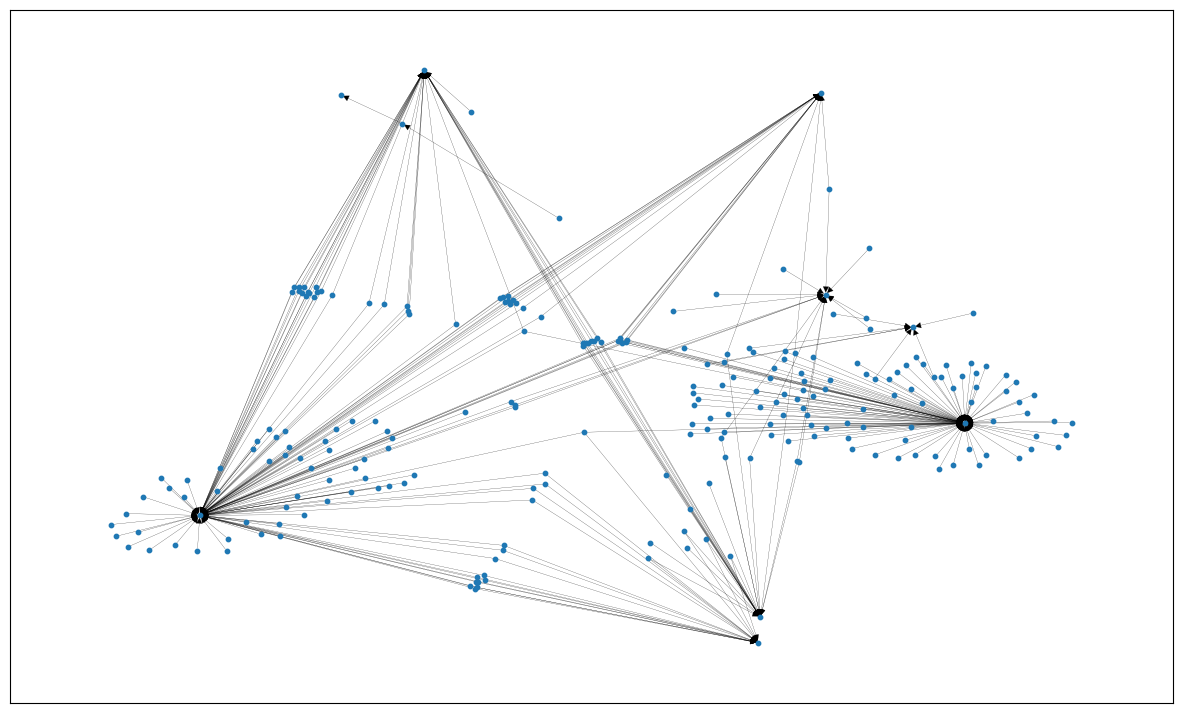

In [56]:
import matplotlib.pyplot as plt

print(graph)

plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)